1) $d = 2*r = 0.218±0.002$ meters

2) This document

3) $B_E = \frac{\mu_0*N}{2r}*slope = 1.82*10^{-5}±2.5*10^{-7}$ Tesla for 100 turns 

4) For 100 coils, $B_E = 1.82*10^{-5}±2.5*10^{-7}$ agrees with the accepted value of $1.84*10^{-5}$: ($1.82*10^{-5}-2.5*10^{-7} < 1.84*10^{-5} < 1.82*10^{-5}+2.5*10^{-7}$)

   For 200 coils, $B_E = 1.89*10^{-5}±2*10^{-7}$ disagrees with the accepted value: ($1.89*10^{-5}-2*10^{-7} > 1.84*10^{-5}$)
   
   For 300 coils, $B_E = 1.9*10^{-5}±2*10^{-7}$ disagrees with the accepted value: ($1.9*10^{-5}-2*10^{-7} > 1.84*10^{-5}$)
   
5) The deflection angle is proportional to magnetic field strength, which is also directly proportional to both the current and the number of coils, so raising the number of coils lowers the amount of current needed to get the same deflection angle.

In [1]:
import numpy as np
import matplotlib.pyplot as plot
from autoErr import autoErr

def arr_with_err(err, ls):
    return np.array(list(map(lambda v: autoErr(v, err),ls)))

In [54]:
theta_100 = arr_with_err(1, [10,-10,20,-20,30,-30,40,-40,50,-50])
i_100 = arr_with_err(0.1, [5.8,6.7,11.6,-11.6,18.4,-16,25.7,-26.8,38.8,-39.1]) * 1e-3
n_100 = autoErr(100,1)
theta_200 = theta_100
i_200 = arr_with_err(0.1, [2.16,-3.3,5.96,-5.97,8.71,-9.74,12.88,-14.27,19.56,-19.97]) * 1e-3
n_200 = 100 + n_100
theta_300 = theta_100
i_300 = arr_with_err(0.1, [1.4,-2.4,3.71,-4.45,5.73,-6.74,8.56,-9.74,12.55,-13.68]) * 1e-3
n_300 = 100 + n_200
r = autoErr(0.109, 0.001)

In [55]:
#Mostly just cloned from given plot code
def fit_plot(x, y, dy, x_label='X', y_label='Y', title='Linear Fit Plot'):
    b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
    fit = b+m*x
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2 # Delta
    dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
    db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept
    N = sum(((y-b-m*x)/dy)**2) 

    #-----------------------------------------------------------------------#
    #Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
    plot.figure(figsize=(15,10))

    plot.plot(x, fit, color='green', linestyle='--')
    plot.scatter(x, y, color='blue', marker='o')


    #create labels  YOU NEED TO CHANGE THESE!!!
    plot.xlabel(x_label)
    plot.ylabel(y_label)
    plot.title(title)

    plot.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars

    plot.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
                 (0.05, 0.9), xycoords='axes fraction')

    plot.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
                 (0.05, 0.85), xycoords='axes fraction')

    plot.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
                 (0.05, 0.80), xycoords='axes fraction')

    plot.show()

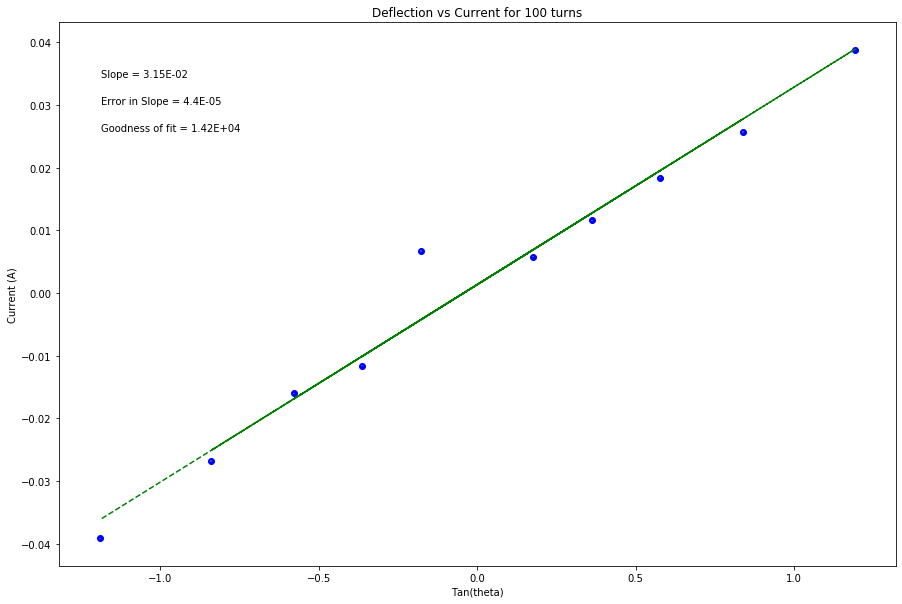

In [56]:
fit_plot(np.tan(np.pi/180*np.vectorize(float)(theta_100)), np.vectorize(float)(i_100), np.vectorize(lambda e: e.err)(i_100),x_label = 'Tan(theta)', y_label='Current (A)', title='Deflection vs Current for 100 turns')

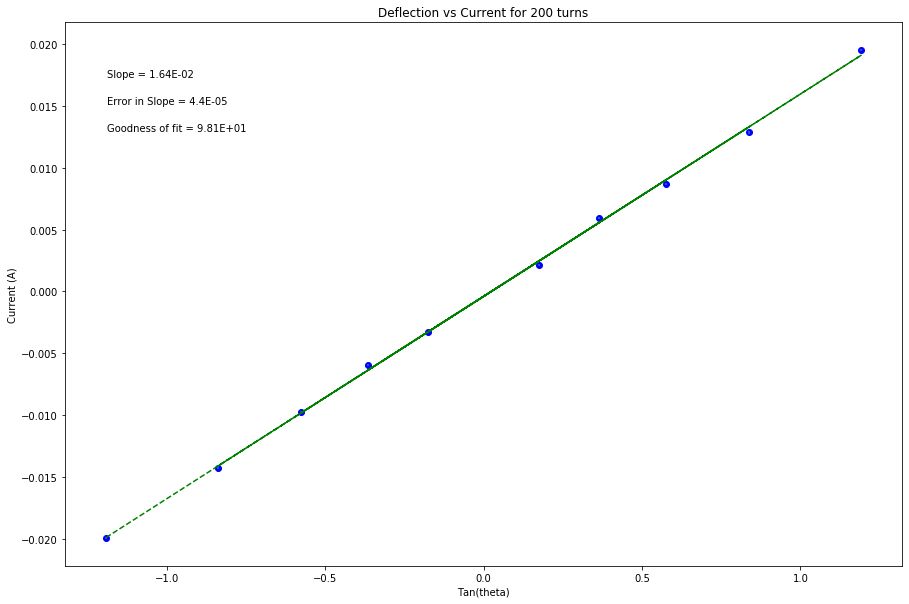

In [57]:
fit_plot(np.tan(np.pi/180*np.vectorize(float)(theta_200)), np.vectorize(float)(i_200), np.vectorize(lambda e: e.err)(i_200),x_label = 'Tan(theta)', y_label='Current (A)', title='Deflection vs Current for 200 turns')

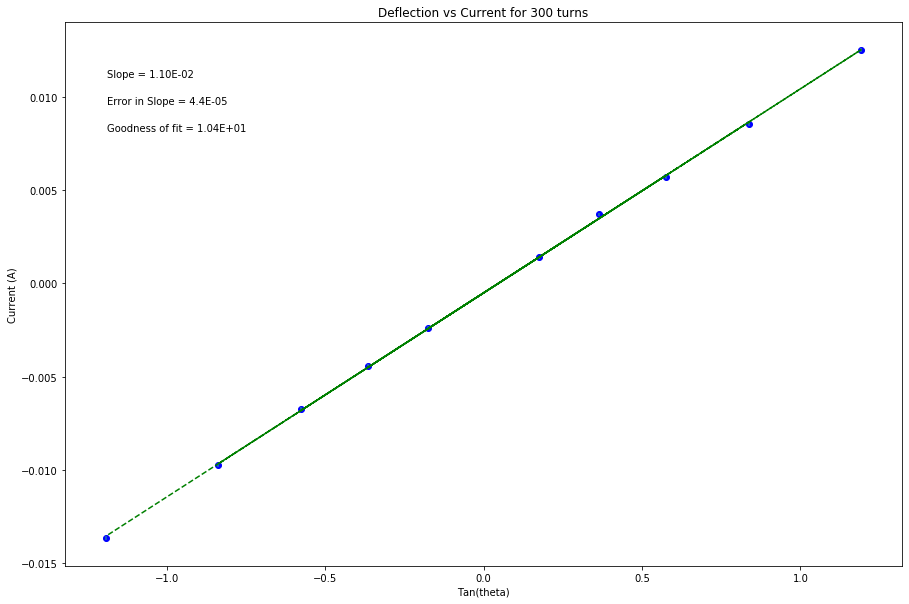

In [58]:
fit_plot(np.tan(np.pi/180*np.vectorize(float)(theta_300)), np.vectorize(float)(i_300), np.vectorize(lambda e: e.err)(i_300),x_label = 'Tan(theta)', y_label='Current (A)', title='Deflection vs Current for 300 turns')

In [59]:
mu_0 = 4e-7*np.pi
#Formula : B_E = B_C/tan = (mu_0 * i * n/2/r)/tan = mu_0/2/r*n*(i/tan)
B_Const = mu_0/2/r
B_Experimental_100 = B_Const * n_100 * autoErr(3.15e-2,4.4e-5)
B_Experimental_200 = B_Const * n_200 * autoErr(1.64e-2,4.4e-5)
B_Experimental_300 = B_Const * n_300 * autoErr(1.1e-2,4.4e-5)

In [77]:
str(B_Experimental_100)

'1.815782909873e-05±2.47719058105518e-07'

In [78]:
str(B_Experimental_200)

'1.8907199823439493e-05±2.0395785960912542e-07'

In [79]:
str(B_Experimental_300)

'1.9022487627240953e-05±2.0066615674059742e-07'

In [76]:
str(2*r)

'0.218±0.002'

In [66]:
accepted = 1.84e-5 #Tesla 

In [68]:
B_Experimental_100.split()[1]

1.840554815683552e-05

In [72]:
B_Experimental_200.split()[0]

1.8703241963830367e-05

In [71]:
B_Experimental_300.split()[0]

1.8821821470500355e-05

In [73]:
2 * r

autoErr(0.218, 0.002)

Because the deflection angle is proportional to magnetic field strength, which is also directly proportional to both the current and the number of coils, raising the number of coils lowers the amount of current needed to get the same deflection angle.